# Introduction into regression analysis

In pattern recognition problem we have

$Y \in D_Y = \{w_1, ... , w_k\}$

is a set of unordered values, i.e. $Y$ - a qualitative variable

**Regression analysis**: $Y \in R$ is a real-valued variable.

Random samples of objects $ \{ o^{(1)}, ... , o^{(N)}\}$

Set of variables $X_1, ... , X_n$

Data table $ x^{(i)}_j = X_j(o^{(i)}),\space j = 1, ... , n; y^{(i)}=Y(o^{(i)}) \space i = 1, ... , N $

Purpose of analysis is to predict values of variable $Y$ depending on values $X$ for any new object by minimizing some expected loss $L(y_{pred}, y_{real})$

Usually we use OLS (ordinary least squares) loss function : $L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$

## Approaches for regression:
* Parametric models
* Non-parametric
* SVM
* Logical rules (regression trees)
* ...


Our linear model will look like:
$$ Y^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + ... + \beta_nx^{(i)}_n + \epsilon^{(i)} $$

$ \epsilon $ - is supposed to be $N(0, \sigma)$, $\epsilon^{(i)}$ and $\epsilon^{(i)}$ are supposed to be independent for $i \neq j $

in matrix form:
**$$ Y = X\beta +  \epsilon $$**

# Examples of regression implementations (OLS)

* scikit-learn - easier to use
* statsmodel - provide stats out of the box (easier to perform statistical tests, and build confidence intervals), but interfaces are a bit harder
* tensorflow - we build linear regression with that library just to grasp a concept of computational graphs and SGD optimization


Coefficients: 
 [ 938.23786125] 152.918861826
Mean squared error: 2548.07
Variance score: 0.47


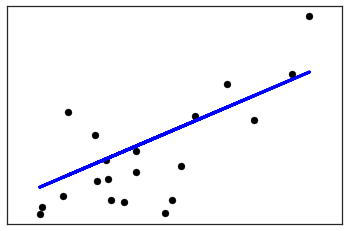

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [72]:
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
X = sm.add_constant(spector_data.exog, prepend=False)
Y = spector_data.endog

# Fit and summarize OLS model
mod = sm.OLS(exog=X, endog=Y)
res = mod.fit()

print(res.summary())
print('RMSE', np.mean((res.predict(X) - Y)**2))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Fri, 02 Jun 2017   Prob (F-statistic):            0.00157
Time:                        18:01:46   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

# Tensorflow linear regression 
You can install it with:
```sh
pip install tensorflow
```
Our model will be small, so it should work fine with CPU.

Tensorflow tl;dr 

First you need to create computational graph with those functions

[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) - reserve place for input

[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) - parameters that you will optimize

tf.add, tf.multiply ... - operations (node of the computational graph) [Read the docs](https://www.tensorflow.org/api_docs/python/tf)

Define:
1. Cost function - it is also the same computational node (`cost` in example bellow)
2. create Optimizer 

When you have finished to creat your computational graph, you need to create Session -> Initialize variables -> Run optimizer/


Epoch: 0050 cost= 0.129105702 W= 0.377315 b= -0.117352
Epoch: 0100 cost= 0.123080350 W= 0.369719 b= -0.0627058
Epoch: 0150 cost= 0.117750995 W= 0.362574 b= -0.0113093
Epoch: 0200 cost= 0.113037340 W= 0.355855 b= 0.0370304
Epoch: 0250 cost= 0.108868249 W= 0.349535 b= 0.0824951
Epoch: 0300 cost= 0.105180860 W= 0.343591 b= 0.125256
Epoch: 0350 cost= 0.101919509 W= 0.338001 b= 0.165473
Epoch: 0400 cost= 0.099035032 W= 0.332742 b= 0.203299
Epoch: 0450 cost= 0.096483894 W= 0.327797 b= 0.238875
Epoch: 0500 cost= 0.094227619 W= 0.323146 b= 0.272335
Epoch: 0550 cost= 0.092232138 W= 0.318772 b= 0.303805
Epoch: 0600 cost= 0.090467311 W= 0.314657 b= 0.333404
Epoch: 0650 cost= 0.088906534 W= 0.310787 b= 0.361241
Epoch: 0700 cost= 0.087526150 W= 0.307148 b= 0.387424
Epoch: 0750 cost= 0.086305439 W= 0.303725 b= 0.41205
Epoch: 0800 cost= 0.085225902 W= 0.300506 b= 0.43521
Epoch: 0850 cost= 0.084271230 W= 0.297478 b= 0.456993
Epoch: 0900 cost= 0.083426945 W= 0.29463 b= 0.477481
Epoch: 0950 cost= 0.0826

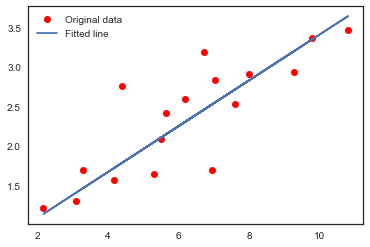

Testing... (Mean square loss Comparison)
Testing cost= 0.0768086
Absolute mean square loss difference: 0.00521158


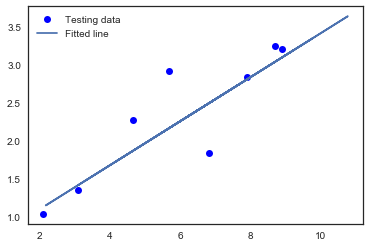

In [73]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


# ---------------------------------------------------------
# Task:
1. download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets
2. build linear regression  using `sqft_living` or `sqft_lot` of house age features 
3. build these regression models using different libraries (sklearn, statsmodel, tensorflow)
4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

#### 1. download dataset make train, test datasets 

In [80]:
# 1 Load the house dataset
house_data = pd.read_csv('kc_house_data.csv')
print(house_data.columns.values)
#house_data.info()
#house_data.tail()

# Use only one feature
feature_X =house_data[['sqft_living']].values
feature_y=house_data[['price']].values

# Split the data into training/testing sets
feature_X_train = feature_X[:500] 
feature_X_test = feature_X[500:1000] 

# Split the targets into training/testing sets
feature_y_train =feature_y[:500]
feature_y_test =feature_y[500:1000]

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


#### 2 build linear regression using sqft_living or sqft_lot of house age features

Coefficients: 
 [[ 263.357868]] [-27572.17612481]
Mean squared error: 51061173551.18
Variance score: 0.53


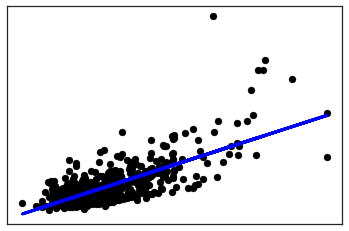

In [81]:
#sklearn

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(feature_X_train, feature_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"% np.mean((regr.predict(feature_X_test) - feature_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(feature_X_test, feature_y_test))

# Plot outputs
plt.scatter(feature_X_test, feature_y_test,  color='black')
plt.plot(feature_X_test, regr.predict(feature_X_test), color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

#### 3 build these regression models using different libraries (sklearn, statsmodel, tensorflow)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     2554.
Date:                Fri, 02 Jun 2017   Prob (F-statistic):          2.21e-198
Time:                        18:03:39   Log-Likelihood:                -6934.4
No. Observations:                 500   AIC:                         1.387e+04
Df Residuals:                     499   BIC:                         1.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           252.2997      4.993     50.533      0.0

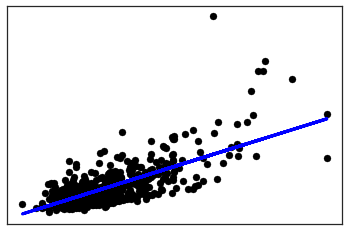

In [82]:
#statsmodel
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(exog=feature_X_train, endog=feature_y_train)
res = mod.fit()

print(res.summary())
print('RMSE', np.mean((res.predict(feature_X_train) - feature_y_train)**2))

plt.scatter(feature_X_test, feature_y_test,  color='black')
plt.plot(feature_X_test, res.predict(feature_X_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Epoch: 0050 cost= 33450043392.000000000 W= 233.933 b= 0.585208
Epoch: 0100 cost= 32571670528.000000000 W= 250.951 b= 0.589862
Epoch: 0150 cost= 32566935552.000000000 W= 252.193 b= 0.588183
Epoch: 0200 cost= 32566915072.000000000 W= 252.282 b= 0.586022
Epoch: 0250 cost= 32566913024.000000000 W= 252.289 b= 0.583821
Epoch: 0300 cost= 32566913024.000000000 W= 252.29 b= 0.581619
Epoch: 0350 cost= 32566908928.000000000 W= 252.291 b= 0.579417
Epoch: 0400 cost= 32566910976.000000000 W= 252.291 b= 0.577214
Epoch: 0450 cost= 32566910976.000000000 W= 252.291 b= 0.575012
Epoch: 0500 cost= 32566910976.000000000 W= 252.291 b= 0.57281
Epoch: 0550 cost= 32566910976.000000000 W= 252.291 b= 0.570607
Epoch: 0600 cost= 32566910976.000000000 W= 252.291 b= 0.568405
Epoch: 0650 cost= 32566910976.000000000 W= 252.291 b= 0.566202
Epoch: 0700 cost= 32566910976.000000000 W= 252.291 b= 0.564
Epoch: 0750 cost= 32566908928.000000000 W= 252.291 b= 0.561798
Epoch: 0800 cost= 32566908928.000000000 W= 252.291 b= 0.5595

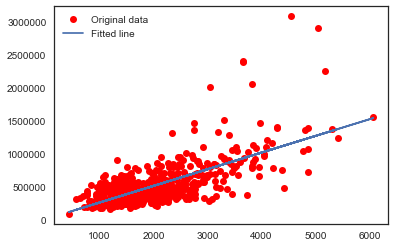

Testing... (Mean square loss Comparison)
Testing cost= 2.56214e+10
Absolute mean square loss difference: 6.94556e+09


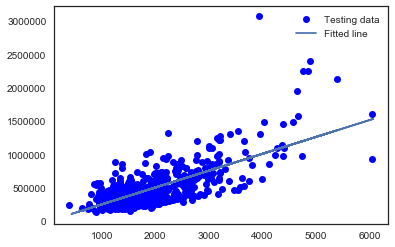


ten
R2_ten= 0.440051612892
R2a_ten= 0.43892721854
RMSE_ten= 226368.567179


In [83]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.00000001
training_epochs = 1000
display_step = 50

# Training Data
train_X = feature_X_train 
train_Y = feature_y_train 
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = feature_X_test
    test_Y = feature_y_test 

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    print ('')
    print ('ten')
    R2_ten=(np.sum((np.mean(test_Y)-sess.run(W) * test_X + sess.run(b))**2))/np.sum((test_Y-np.mean(test_Y))**2)
    print('R2_ten=',R2_ten)
    R2a_ten=1-(1-R2_ten)*(X_test-1)/(X_test-2)
    print( 'R2a_ten=',R2a_ten)
    RMSE_ten=np.sqrt(np.sum((test_Y-sess.run(W) * test_X + sess.run(b))**2)/X_test)
    print ( 'RMSE_ten=',RMSE_ten)

### 4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

In [84]:
X_test=len(feature_X_test)

print ('sklearn')
R2_lin=1-np.sum((feature_y_test-regr.predict(feature_X_test))**2)/np.sum((feature_y_test-np.mean(feature_y_test))**2)
R2a_lin=1-(1-R2_lin)*(X_test-1)/(X_test-2)
RMSE_lin=np.sqrt(sum((feature_y_test-regr.predict(feature_X_test))**2)/X_test)
print('R2=',R2_lin, 'R2a=',R2a_lin, 'RMSE=',RMSE_lin)

print ('')
print ('statsmodel')
R2_st=(np.sum((np.mean(feature_y_test)-res.predict(feature_X_test))**2))/np.sum((feature_y_test-np.mean(feature_y_test))**2)
R2a_st=1-(1-R2_st)*(X_test-1)/(X_test-2)
RMSE_st=np.sqrt(np.sum((feature_y_test-res.predict(feature_X_test))**2)/X_test)
print('R2=',R2_st, 'R2a=',R2a_st, 'RMSE=',RMSE_st)



sklearn
R2= 0.526858524939 R2a= 0.525908441656 RMSE= [ 225967.19574129]

statsmodel
R2= 0.440079017812 R2a= 0.43895467849 RMSE= 8815116.36857


# Categorical variables

Task:
1. Answer the questions:
    - What is a categorical variables?
    - Which features from the house sales dataset are categorical?
    - How can you make model using these features?

In [85]:
house_data.info()
house_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Answer 
1. categorical variables (qualitative or attribute variables). The values can be put into a countable number of categories or different groups. Categorical data may or may not have some logical order.

2. Which features from the house sales dataset are categorical? ID,zipcode,waterfront,view

3. How can you make model using these features? it is neccessary to "treat" such variables, for example convert its to numbers.

## Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.


![reg_picture](https://qph.ec.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02)


Task:
1. Build crosscorrelation table for features
2. Fit linear regression model using at least 2 highly correlated features
3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models. [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

In [86]:
# 1 build correlation matrix
!pip install seaborn
import seaborn as sns
sns.set(style="white")
c=house_data.corr()                    
house_data.corr()                                                                                                                                                                                                                                                                                                                                

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


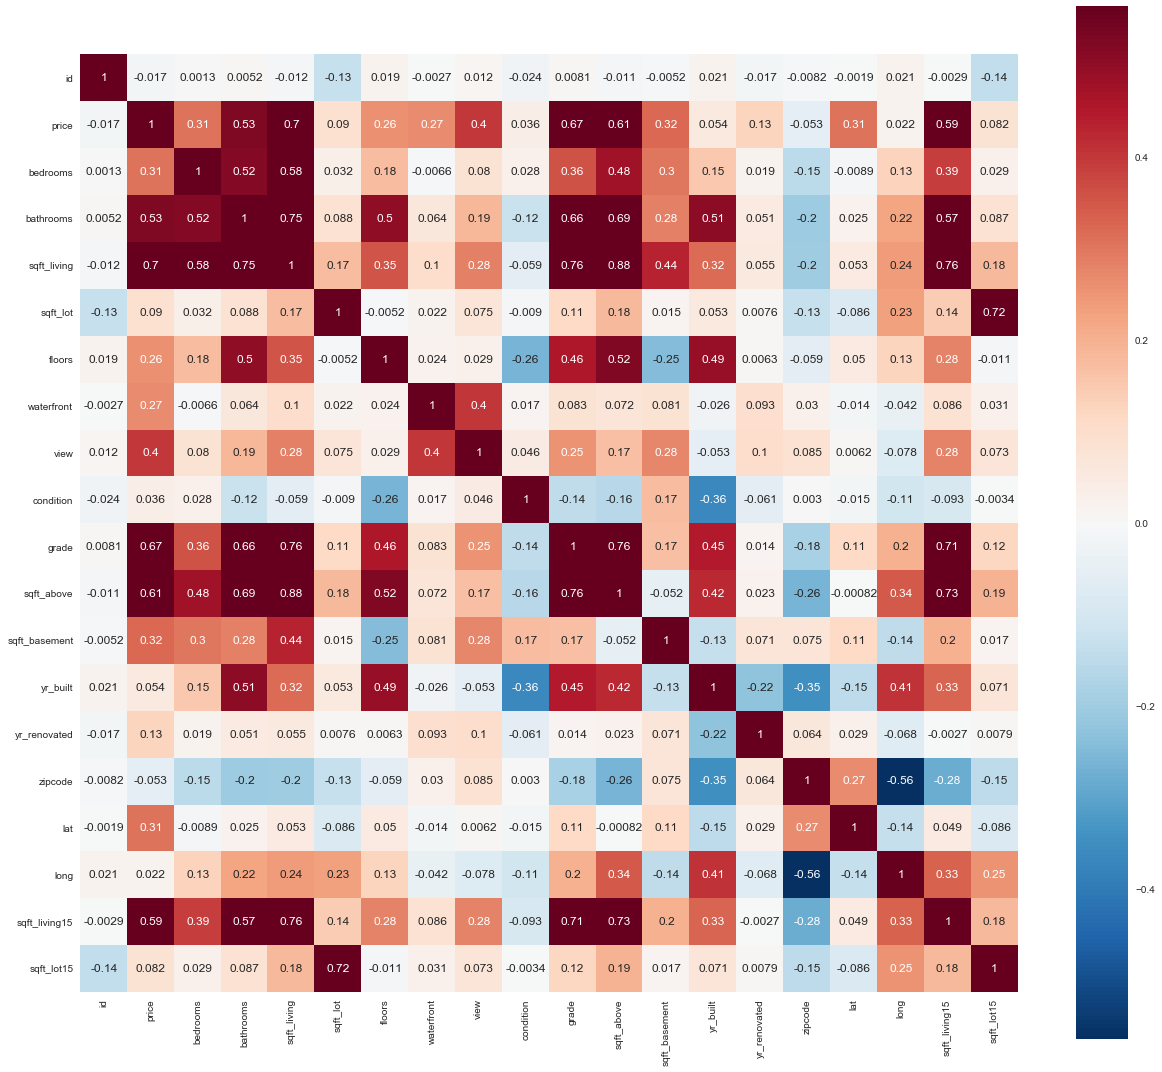

In [87]:
# Generate a mask for the upper triangle
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(c, annot=True,vmax=0.31,square=True)
plt.show()

In [88]:
# 2 Fit linear regression model using at least 2 highly correlated features

# Use several features
indices = (4, 5)
X_train =np.array(house_data.values[:500, indices]).reshape(500,2)
X_test = np.array(house_data.values[500:1000, indices]).reshape(500,2)
y_train = np.array(house_data.values[:500,2]).reshape(500,1)
y_test = np.array(house_data.values[500:1000,2]).reshape(500,1)

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

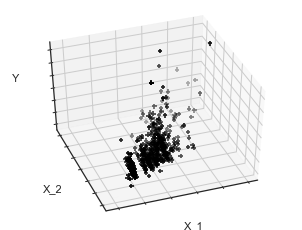

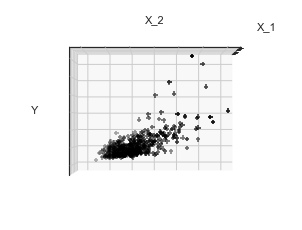

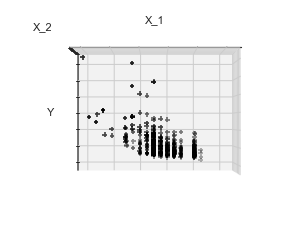

In [89]:
from mpl_toolkits.mplot3d import Axes3D
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],[-.1, .15, -.1, .15]]).T).reshape((2, 2)),alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

#Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

#### 3 Plot values of regrssion coefficients as a function of regularization parameter  α for LASSO and RIDGE models.

In [90]:
from sklearn.linear_model import Ridge

X = X_train 
y = y_train 

In [91]:
n_alphas = 500
alphas = np.logspace(-6, 6, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

In [92]:
np.array(coefs)[:,0][:,0]

array([ -1.29381409e+04,  -1.29381409e+04,  -1.29381409e+04,
        -1.29381409e+04,  -1.29381409e+04,  -1.29381409e+04,
        -1.29381408e+04,  -1.29381408e+04,  -1.29381408e+04,
        -1.29381408e+04,  -1.29381408e+04,  -1.29381408e+04,
        -1.29381408e+04,  -1.29381408e+04,  -1.29381408e+04,
        -1.29381408e+04,  -1.29381408e+04,  -1.29381408e+04,
        -1.29381407e+04,  -1.29381407e+04,  -1.29381407e+04,
        -1.29381407e+04,  -1.29381407e+04,  -1.29381407e+04,
        -1.29381407e+04,  -1.29381406e+04,  -1.29381406e+04,
        -1.29381406e+04,  -1.29381406e+04,  -1.29381406e+04,
        -1.29381406e+04,  -1.29381405e+04,  -1.29381405e+04,
        -1.29381405e+04,  -1.29381405e+04,  -1.29381404e+04,
        -1.29381404e+04,  -1.29381404e+04,  -1.29381403e+04,
        -1.29381403e+04,  -1.29381403e+04,  -1.29381402e+04,
        -1.29381402e+04,  -1.29381401e+04,  -1.29381401e+04,
        -1.29381400e+04,  -1.29381400e+04,  -1.29381399e+04,
        -1.29381399e+04,

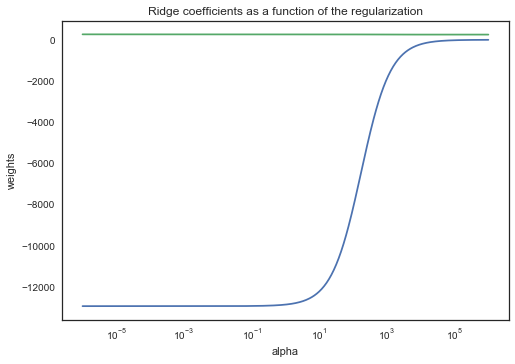

In [93]:
ax = plt.gca()

ax.plot(alphas, np.array(coefs)[:,0][:,0])
ax.plot(alphas, np.array(coefs)[:,0][:,1])
ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [94]:
from sklearn.linear_model import Lasso

n_alphas = 500
alphas = np.logspace(-6, 6, n_alphas)
clf_1 = linear_model.Lasso(fit_intercept=False)

coefs = []
for a in alphas:
    clf_1.set_params(alpha=a)
    clf_1.fit(X, y)
    coefs.append(clf_1.coef_)

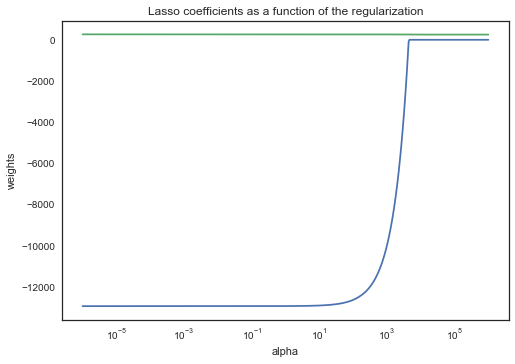

In [95]:
ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Regression trees 

Task:
1. try `sklearn.tree.DecisionTreeRegressor`
2. compare models using $R^2$, $R^2_{adj}$ and RMSE 


In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regr = DecisionTreeRegressor(random_state=0)
regr=regr.fit(feature_X_train, feature_y_train)

X_test=len(feature_X_test)
R2_rt=1-np.sum((np.mean(feature_y_test)-regr.predict(feature_X_test))**2)/np.sum((feature_y_test-np.mean(feature_y_test))**2)
R2a_rt=1-(1-R2_rt)*(X_test-1)/(X_test-2)
RMSE_rt=np.sqrt(np.sum((feature_y_test-regr.predict(feature_X_test))**2)/X_test)
print('R2=',"%.3f" % R2_rt, 'R2a_rt=',"%.3f" % R2a_rt, 'RMSE=',"%.3f" %RMSE_rt)

R2= 0.047 R2a_rt= 0.045 RMSE= 10264572.332


### Compare models

In [97]:
table = pd.DataFrame(columns=['sklearn','statsmodel', 'tenserflow','regression tree'])
table.loc["R2"] = ["%.3f" % R2_lin,"%.3f" % R2_st,"%.3f" % R2_ten,"%.3f" % R2_rt]
table.loc["R2a"] = ["%.3f" % R2a_lin,"%.3f" % R2a_st,"%.3f" % R2a_ten,"%.3f" % R2a_rt]
table.loc["RMSE"] = ["%.3f" % RMSE_lin,"%.3f" % RMSE_st, "%.3f" % RMSE_ten,"%.3f" % RMSE_rt]
print (  table)

         sklearn   statsmodel  tenserflow regression tree
R2         0.527        0.440       0.440           0.047
R2a        0.526        0.439       0.439           0.045
RMSE  225967.196  8815116.369  226368.567    10264572.332


here is the final table. 
after comparing all models, some conclusions about calculated values R2,R2 adjusted,RMSE (root mean squared error) can be made.
as we see there are huge values of RMSE for each model, this is connected with the fact that RMSE refers to the 'price' feature, which values are also quite a big. Lower values of RMSE indicate better fit. 

all others values should range from 0 to 1. 0 indicating that the proposed model does not improve prediction, 1 indicating perfect prediction. increases in R2 means model's improvements. 